In [53]:
import xpress as xp
xp.controls.outputlog = 0 # turn off output log

import numpy as np
import pylab as pl

In [54]:
# Define weight and values of the knapsack items
n_items = 8
n_bags = 2
max_bag_weight = 15

weights = np.array([1, 7, 4, 3, 5, 6, 2, 7])
ratings = np.array([2, 9, 3, 8, 10, 6, 2, 10])
availabilities = np.array([4, 2, 3, 2, 1, 1, 3, 1])

In [55]:
knapsack = xp.problem()

In [56]:
x = np.array([[xp.var(vartype=xp.integer, lb=0) for i in range(n_items)] for j in range(n_bags)], dtype=xp.npvar)
knapsack.addVariable(x)

In [57]:
# Weight constraint
knapsack.addConstraint(xp.Dot(x, weights) <= max_bag_weight)

In [58]:
# Availability constraint
knapsack.addConstraint(xp.Dot(np.ones(n_bags), x) <= availabilities)

In [59]:
knapsack.setObjective(xp.Sum(x*ratings), sense=xp.maximize)

In [60]:
knapsack.solve()

In [61]:
knapsack.getProbStatusString()

'mip_optimal'

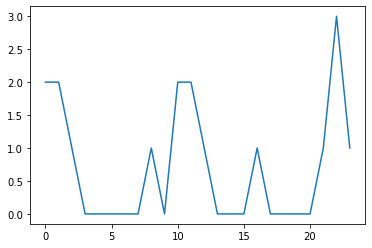

In [62]:
pl.plot(knapsack.getSolution())

In [63]:
# Print knapsack solution
knapsack.getSolution(), knapsack.getObjVal()

([2.0,
  2.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  2.0,
  2.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  3.0,
  1.0],
 83.0)